# Welcome

This python notebook is a step-by-step guide to training a neural network on Google Colab using the *MISO* particle classification library.

The MISO library is a set of python scripts that simplify creating, training and saving a convolutional neural network (CNN) primarily for particle images, such as foraminifera.

The MISO library can be used to train common CNN topologies such as ResNet, and also includes a custom CNN design, "base_cyclic", that was developed at CEREGE and gives good results with quick training time.

Training assumes single particle images with the particles roughly centred in the image, and saved in jpeg, bmp, tiff or png format.

**Note:** The notebook is interactive - you run the code inside it. Code cells are coloured light grey. To run a cell, hover the mouse above it and click the play arrow in the top-left corner.

# Getting Started

## Save a copy (recommended)

If you want to keep a copy of this notebook and any changes you make, please make a copy:

*   Click *File* -> *Save a copy in Drive...* to save this notebook in your Google Drive.
*   A new Google Colab tab will open up with a copy of the notebook.
*   Click *File* -> *Rename...* to give the notebook a more memorable name.

## Enabling the GPU (Important)

For fast training we need to enable the GPU. 

In the menu bar of the Google Colab webpage, click *Runtime* -> *Change runtime type* and in the dialog that pops up, change *Hardware accelerator* to *GPU*. Click save to restart Google Colab with a GPU.

**Note:** You can check which GPU has been enabled using the `!nvidia-smi` command. The `T4` is 3-4 times faster than the `K80`.

In [0]:
!nvidia-smi

Thu Aug 15 10:44:03 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8    26W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

## MISO library

The MISO python library contains the code for creating and training the neural networks.

It must be installed from its bitbucket repository by running the cell below.

**Note:** Google Colab will prompt you (at the bottom of the cell) to restart the runtime if you have already installed the library this session.

In [0]:
!pip install -U git+https://www.github.com/microfossil/particle-classification.git

  Cloning https://www.github.com/microfossil/particle-classification.git to /tmp/pip-req-build-apy5j3xy
  Running command git clone -q https://www.github.com/microfossil/particle-classification.git /tmp/pip-req-build-apy5j3xy
     |████████████████████████████████| 81kB 6.7MB/s 
     |████████████████████████████████| 51kB 19.8MB/s 
  Created wheel for miso: filename=miso-2.0.5-cp36-none-any.whl size=53391 sha256=bac87cf86bb70b9cfe5a39de51c086c1f73aa22bdc7815410db545d34c9bcea5
  Stored in directory: /tmp/pip-ephem-wheel-cache-hle6mbmo/wheels/fa/5a/73/ed76594e8568f1d5cbdfcfd6c71a822079a85d15747fabcb8d
Successfully built miso
ERROR: segmentation-models 0.2.1 has requirement image-classifiers==0.2.0, but you'll have image-classifiers 0.2.2 which is incompatible.


# Dataset

## Preparation

The training set consists of images of the classes to classify, sorted into directories by class name.

For detailed instructions on constructing a training set please see:

https://particle-classification.readthedocs.io/en/latest/tutorial/dataset_creation.html

**Structure**

The structure of the dataset must be a 1) single root folder with the dataset name, containing 2) a subfolder for each class, with the same name as the class, and 3) all the images for that class inside of it.

## Make available to Google Colab

To use an image dataset for training, it must be accessable to Google Colab

There are three method to do this

1.   Zip the dataset and upload it to a sharing site that supports direct links, such as Dropbox, Onedrive, Owncloud, Nuage, etc. *Google Drive does not work*
2.   Upload the dataset to Google Drive
3.   Zip the dataset and upload it to Google Colab (not recommended)


**Before continuing**

If not already open, click the small arrow under the Colab icon (CO) in the upper left corner of the webpage to open the left pane, and then go to the *Files* tab.

## Upload to Dropbox / OneDrive / OwnCloud / Nuage etc

This method is quick, doesn't require Google Drive installed, and you can share the link to the training set with other people.

It does not work with Google Drive, as it is currently impossible to get a direct download link for large datasets.

### 1. Create a zip file

We must create a zip file of the dataset

Make sure the name of the root folder is a unique name that will not conflict with any other dataset.

Compress the root folder of the dataset into a .zip file

Windows: Right-click the root folder, then click *Send to --> Compressed (zipped) folder*

Mac: Right-click the root folder, then click *Compress items*

### 2. Upload

Upload the zip file onto your favourite cloud sharing provider, e.g. Dropbox or Onedrive

### 3. Create a sharing link

Once the file has finished uploading or syncing, create a sharing link for the file.

For example, in Dropbox in Windows, right-click your zip file in the dropbox folder and select Copy Dropbox Link.

If you have the option to set permissions for the link (e.g. with OneDrive) make sure they are read-only so that you can share the data without others being able to edit it.

### 4. Convert the link into a direct download link

For some sharing services such as Dropbox and Onedrive, the sharing link points to a *website* where you can download the file. We need a link that goes directly to the file instead.

Thus, the link must be changed from the website link to the direct download link.

**Dropbox:**

Change www.dropbox.com to dl.dropboxusercontent.com:

For example,

https://www.dropbox.com/s/wlxcp29u8t0z9yw/DummyFile.TXT?dl=0

becomes

https://dl.dropboxusercontent.com/s/wlxcp29u8t0z9yw/DummyFile.TXT?dl=0

**OneDrive:**

Change the ms in the first part of the link to ws.

For example,

https://1drv.ms/u/s!AiQM7sVIv7fah4IZlw0GmHAwmOT9DY

becomes

https://1drv.ws/u/s!AiQM7sVIv7fah4IZlw0GmHAwmOT9DY

**Nuage / Owncloud:**

Add `/download` to the end of the link.

For example,

https://nuage.osupytheas.fr/s/crYrKyXdQqAR5E6

becomes

https://nuage.osupytheas.fr/s/crYrKyXdQqAR5E6/download

**Other services:**

For other services, check if the sharing link is a direct download link by pasting it into the address bar of your internet browser and pressing enter.

If the zip file starts downloading, it is a direct download link already, and nothing needs to be changed. If it goes to a website, you may need to search how to create a direct download link for you particular service. Not that for Google Drive files there is currently no way to create a direct download link for large files (it will go to a anti-virus confirmation website).

## Upload to Google Drive

Googe Drive is a sharing service that gives you about 15GB of storage. Everyone with a Google account automatically has a Google Drive account. 

### 1. Upload

There is no need to create a zip file with this method.

Instead, create a `datasets` directory on your Google Drive and save the root folder to it. This can either be done online, or by syncing with Google Drive on your computer.

To download Google Drive, go to https://drive.google.com/drive/my-drive, click the settings icon (gear icon in top right) and then click *Get Backup and Sync for Windows*.

### 2. Mount

Run the cell below to mount your google drive on Google Colab. Once mounted, all your files on Google Drive are accessable from the *Files* tab on the left under `/content/drive`

In [0]:
from google.colab import drive
drive.mount('/content/drive')


## Transfer from you computer

You can transfer the images directly from your computer and save them on Google Colab. 

The disadvantages of this method are that ploading the data can be slow and it is deleted from Google Colab when the session ends.

### 1. Create a zip file

We must create a zip file of the dataset as for the first method.

Make sure the name of the root folder is a unique name that will not conflict with any other dataset.

Compress the root folder of the dataset into a .zip file

Windows: Right-click the root folder, then click Send to --> Compressed (zipped) folder

Mac: Right-click the root folder, then click Compress items

### 2. Create directory

Now we create a directory called `datasets` in Google Colab by running the following cell:

In [0]:
import os

os.makedirs("/content/datasets/", exist_ok=True)

Click *Refresh* in the *Files* tab in the left pane of the Google Colab screen. You should see  a new directory called datasets that contains the dataset folder.

### 3. Upload

In the *Files* tab in the left pane of Google Colab, right-click the newly created *datasets* directory and click *Upload*.

Choose the zip file and start the upload. The progress is shown at the bottom of the *Files* tab.

### 4. Unzip

Once the file has uploaded, right-click the zip filename in the *Files* pane, and click *Copy path*.

Paste the copied path in the cell below (replacing PASTE_HERE) and run it:

In [0]:
!unzip PASTE_HERE

You should see a new folder *drive* in the *Files* tab. If not, click *Refresh*




# Training

We are now ready to configure the network and begin training!

We shall use the simple training interface provided by the MISO python library.

It allows us to train the dataset using a variety of pre-made neural network topologies. The results and the trained neural network are saved on Google Colab for download.

**Note:** The directories on Google Colab are cleared after each session. Remember to download the results before quitting!

## Configuration

### 1. Setup

First we load the training method and create a dictionary to hold the configuration parameters.

The `default_params` function is used to initialise the parameters.

In [0]:
from miso.training.model_trainer import train_image_classification_model
from miso.training.model_params import default_params

params = default_params()
print(params)

Using TensorFlow backend.


{'name': 'default', 'description': None, 'type': 'base_cyclic', 'filters': 4, 'use_batch_norm': True, 'global_pooling': None, 'activation': 'relu', 'img_height': 128, 'img_width': 128, 'img_channels': 1, 'batch_size': 64, 'max_epochs': 5000, 'alr_epochs': 40, 'alr_drops': 4, 'input_source': None, 'output_dir': None, 'data_min_count': 40, 'data_split': 0.25, 'seed': None, 'use_class_weights': True, 'save_model': 'frozen', 'save_mislabeled': False, 'use_augmentation': True, 'aug_rotation': True, 'aug_gain': [0.8, 1, 1.2], 'aug_gamma': [0.5, 1, 2], 'aug_bias': None, 'aug_zoom': [0.9, 1, 1.1], 'aug_gaussian_noise': None}




Add a short name and description for the network.

*   The short name will be used to identify the network and construct the output save directory.
*   The description can be a more in-depth summary of the network and dataset. Set to *None* to have the description automatically generated.




In [0]:
params['name'] = 'google_colab_example'
params['description'] = None

### 2. Input

Configure the location of the training set according to the method used to upload previously:

**Zip file on Dropbox / OneDrive / OwnCloud / Nuage etc.:**

Set the `input` parameter as the direct download link URL. (The training script will download the file and unzip it to a directory when run). Enclose the address with quotes and with `r` at the front. For example:

`params['input_source'] = r'https://nuage.osupytheas.fr/s/crYrKyXdQqAR5E6/download'`

**Google Drive**

Use the path to the folder on Google Drive. To easily get the path, navigate to the base folder of the dataset in the *Files* tab, right-click the folder and select *Copy Path*. For example

`params['input_source'] = r'/content/drive/My Drive/datasets/DATASET_NAME'`

**Transfer from computer**

Use the path to the folder as well

In [0]:
params['input_source'] = r'https://1drv.ws/u/s!AiQM7sVIv7fah4MN2gWCXDWX_DT0OA?e=Eu3lZh'
# params['input_source'] = r'/content/datasets/DATASET_NAME'
# params['input_source'] = r'/content/drive/My Drive/datasets/DATASET_NAME'

### 3. Input Options

Other input parameters are:

####Minimum count per class

For training to work well there should be a minimum number of examples in each class. We recommend at least 40, and ideally 200, but it depends on how variable the images are in the dataset. Setting `data_min_count` excludes any classes which have fewer than that many images.

####Test / train split

A random proportion of the dataset is set aside for testing. That is, it is not used in training and is instead used to evaluate the accuracy of the network. The proportion of test images is usually around 25% and is set with `data_split`. The split between test and train is normally random, but you can set the random seed to an integer ensure the same split is used if necessary.

####Class weights

If the dataset is heavily unbalanced with lots of images in only a few classes, training may give good accuracy on those classes at the expense of accuracy for the classes with few images. To account for this, we can weight the importance of the classes according to their counts by settings `use_class_weights` to `True`

In [0]:
params['data_min_count'] = 40
params['data_split'] = 0.25
params['seed'] = None
params['use_class_weights'] = True

### 4. Output

The output location specifies where the training results (trained CNN model, graphs, etc) will be saved on Google Colab.

You can save them in the Google Colab:

`params['output_dir'] = r'/content/output/'`

Or in your Google Drive folder, e.g.:

`params['output_dir'] = r'/content/drive/My Drive/output/'`

Saving to Google Drive has the advantage that the results will be synced to your computer automatically.

In [0]:
params['output_dir'] = r'/content/output/'
# params['output_dir'] = r'/content/drive/My Drive/output/

**Note:** For Google Drive, if you have not already done so, the drive must be mounted on Google Colab but running the following cell and entering the code:

In [0]:
from google.colab import drive
drive.mount('/content/drive')

### 5. Output Options

Other input parameters are:

####Save the model

There are three option to save the model (trained network) using the `save_model` parameter:

*  `None`: Don't save the model
*  `saved_model`: Save the model in Tensorflow saved model format
*  `frozen`: Freeze and save the model **(recommended)**

The `frozen`method is recommended so that the trained network can be used in the *ParticleTrieur* program. Models can be quite large (20 - 100MB depending on type).

####Estimate mislabeled

If enabled, mislabeled images in the training (and test) dataset are estimated by using k-NN to compare the CNN feature vector (output of penultimate dense layer) with other images, and flagging those images where the more similar images belong to a different class. E.g. if the image is labeled in class A but the more similar images are in class B, it will be flagged as mislabeled. A figure is generated for each potentially mislabeled image in the output directory. Set `save_mislabeled` to `True` to enable.

In [0]:
params['save_model'] = 'frozen'
params['save_mislabeled'] = True

### 6. Type

The type of convolutional neural network determines the accuracy of classification, the time to finish training and the size of the network files.

The types available are:

####Base Cyclic#### 

Codes: `base_cyclic`

This CNN was developed at CEREGE for using with foraminifera particle images. It includes *cyclic layers* that give some rotational invariance internal to the network. The recommened input is greyscale images (single channel) with size 128 x 128 pixels.

This network also has some extra parameters:

*   `filters`: Number of filters in the first convolution layer (default: 4)

####ResNet####

Codes: `resnet18, resnet34, resnet50, resnet101, resnet150`

ResNet is a popular, high-perfoming CNN that uses *skip connections* to ensure that both small and large features propogate to the final classification layers. The recommended input is colour images (RGB) with size 224 x 224 pixels.

There are multiple sizes of ResNet, from 18 layers to 150 layers. The larger networks with more layers take longer to train.

####Transfer Learning####

Codes: `resnet50_tl`

This uses a ResNet50 network that has been pre-trained on ImageNet to generate feature vectors which are then trained in a two-layer flat network. It is almost as accurate as the previous network types but much much faster to train. 

We recommend starting with this network to get an idea of the rough accuracy for your dataset and to check that everything is running correctly.




In [0]:
params['type'] = 'resnet50_tl'
params['img_height'] = 128
params['img_width'] = 128
params['img_channels'] = 1

# Custom parameters for base_cyclic
params['filters'] = 4

### 7. Training

####Batch size

A default batch size of 64 is used for training. The batch size can be reduced if there are out-of-memory errors, however this should not be a problem on Google Colab.

####Adaptive learning rate (ALR)

When training the network, the learning rate (how rapidly the network weights are allowed to change) is dropped by half whenever the improvement in loss (how well the network fits the training data) reaches a plateau. The plateau is detected by looking at the loss over the most recent number of epochs. Training is stopped after this plateau is reached a certain number of times.

This adaptive learning rate system is controlled by two parameters:

*   `alr_epochs`: The number of epochs (complete runs through the training data) to consider when detecting the plateau.
*   `alr_drops`: The number of times the learning rate is dropped (plateau detected) after which training is stopped.

A larger `alr_epochs` will result in better accuracy but longer training time, with diminishing returns. From experience we have found that a value of 40 works well for datasets with about 200 images per class, and 5-10 for large datasets with 1000+ images per class.

####Maximum limit

There is another parameter `max_drops` that sets the maximum number of epochs after which training will be stopped regardless. Typically we set this to a high number, as the ALR system will usually stop training before this is reached. However, you can also set it to a very small number, e.g. 2, to quickly run the training just to check everything is working, before set back to a high number, e.g. 10000, for proper training.



In [0]:
params['batch_size'] = 64
params['alr_epochs'] = 40
params['alr_drops'] = 4
params['max_epochs'] = 10000

## Execution

Now that the parameters have been configured, run the cell below to start training!

The output will show, in order:

*   Loading of the images and if any classes have been skipped due to too few images.
*   The topography of the network (layers and dimensions).
*   A text-based graph showing the progress of training in real-time.
*   Loss and accuracy graphs.
*   Confusion matrix with precision and recall bar graphs.

Training can take a long time depending on the type of network, size of the dataset and number of ALR epochs.

W0815 10:45:10.710125 139698920757120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/miso/training/model_trainer.py:36: The name tf.keras.backend.get_session is deprecated. Please use tf.compat.v1.keras.backend.get_session instead.



@Downloading dataset https://1drv.ws/u/s!AiQM7sVIv7fah4MN2gWCXDWX_DT0OA?e=Eu3lZh...
169779200/169776441 [==============================] - 4s 0us/step
/content/datasets/3e9ab555c4/download.zip
@Parsing image directory...
@Moving classes with not enough images to 'other'...
 - (  196 images) aa
 - (  224 images) aj
 - (  209 images) al
 - (  222 images) c
 - (  202 images) ca
 - (  198 images) co
 - (  211 images) dm
 - (  237 images) p
@1699 images in 8 classes
@Loading images...

@Loading images 5%
@Loading images 11%
@Loading images 17%
@Loading images 23%
@Loading images 29%
@Loading images 35%
@Loading images 41%
@Loading images 47%
@Loading images 52%
@Loading images 58%
@Loading images 64%
@Loading images 70%
@Loading images 76%
@Loading images 82%
@Loading images 88%
@Loading images 94%
@Generating model
94658560/94653016 [==============================] - 4s 0us/step


W0815 10:46:18.511496 139698920757120 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


@Training
|         |         |         |         |         |         |         |         |   #     |  *      | Epoch:   0.0 Batch:    20 #Train:  83.8% (0.5084), *Val:  93.4% (0.2043) !Prob  1.0 Time:  0.00s
|         |         |         |         |         |         |         |         |         |      #* | Epoch:   1.0 Batch:    40 #Train:  96.9% (0.1173), *Val:  98.1% (0.0545) !Prob  1.0 Time:  0.18s
|         |         |         |         |         |         |         |         |         |        #| Epoch:   2.0 Batch:    60 #Train:  99.0% (0.0285), *Val:  99.1% (0.0264) !Prob  1.0 Time:  0.20s
|         |         |         |         |         |         |         |         |         |       *#| Epoch:   3.0 Batch:    80 #Train:  99.1% (0.0237), *Val:  97.6% (0.0785) !Prob  1.0 Time:  0.18s
|         |         |         |         |         |         |         |         |         |       *#| Epoch:   4.0 Batch:   100 #Train:  99.5% (0.0181), *Val:  98.4% (0.0562) !Prob  1.0 Time:  0

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


@Saving model


W0815 10:47:41.958169 139698920757120 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/miso/save/freezing.py:54: simple_save (from tensorflow.python.saved_model.simple_save) is deprecated and will be removed in a future version.
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.simple_save.
W0815 10:47:41.959667 139698920757120 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/saved_model/signature_def_utils_impl.py:201: build_tensor_info (from tensorflow.python.saved_model.utils_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.
W0815 10:47:44.907365 139698920757120 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/tools/fr

@Complete


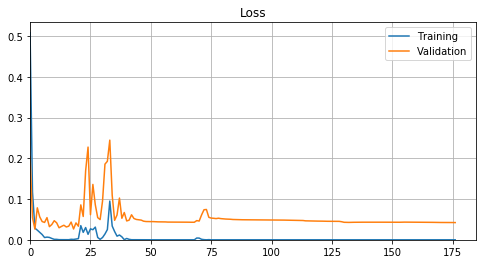

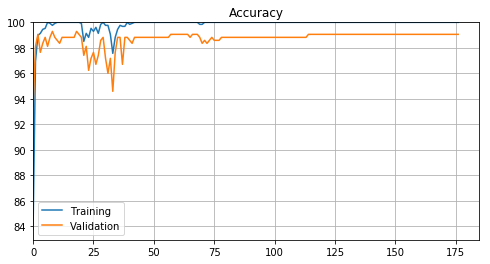

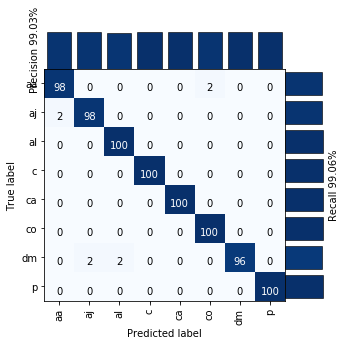

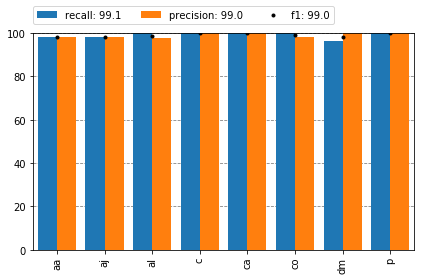

In [0]:
model, vector_model, datasource, result = train_image_classification_model(params)

# Results

The results of training are saved in the output folder, under the network name and the date and time of training.

## Saved Files

###Model

The model folder contains two versions of the saved model.

*   `saved_model.pb` and the `variables` directory contain the model saved in Tensorflow Saver format.
*   `frozen_model.pb` is the model that has been frozen and is ready for use in classification programs.
*   `network_info.xml` is an XML description of the frozen model that describes the structure of the model (e.g. which tensors are used for input and output) and the class labels.

###Mislabeled

The *Mislabeled* directory contains some plots showing images that may have been mislabeled when creating the dataset.

It does this by generating a *feature vector* from the output the second-last dense layer of the network, for each image. The vectors are compared using k-NN for each image. If the class of image predicted using k-NN is different to the label given to the image it is flagged as possibly mislabeled.

###Downloading

Each file can be downloaded individually from the output folder.

If you want to download all files at once, create a zip of the folder:

*   Locate the folder containing the output files in the *Files* tab.
*   Right-click on it and select *Copy Path*.
*   Paste the path in the cell below and run it.
*   Right-click *output.zip* and select *Download*

In [0]:
!zip -r /content/output.zip PAST_PATH_HERE


##Python output

The training function also returns python variables that can be used for further inference

*   `model`: The trained Keras model.
*  `vector_model`: Sub-model of the trained model that outputs the feature vector.
*   `datasource`: The training and test images and class labels.
*   `result`: The results of training: accuracy and per-class precision and recall.

Run the cell below to print the attributes of each object:

In [0]:
def print_attributes(obj, name):
  print("---------------------------------------------------------------------")
  print(name + ":")
  print("---------------------------------------------------------------------")
  print("\n".join([attr for attr in dir(obj) if not attr.startswith('__')]))
  print()
  
print_attributes(result, "result")
print_attributes(datasource, "datasource")

---------------------------------------------------------------------
result:
---------------------------------------------------------------------
acc
accuracy
cls_labels
epochs
f1_score
loss
mean_f1_score
mean_precision
mean_recall
model_params
precision
recall
support
training_time
val_acc
val_loss
y_pred
y_prob
y_true

---------------------------------------------------------------------
datasource:
---------------------------------------------------------------------
cls_labels
data_df
get_class_weights
get_classes
get_dataframe_hash
get_images
get_short_filenames
load_images
load_images_using_datagen
make_image_square
num_classes
set_directory_source
set_xml_source
source_directory
split
test_cls
test_df
test_images
test_onehots
test_vectors
train_cls
train_df
train_images
train_onehots
train_vectors

